# Peer Group Leinding - Predicting Intrest rate based on the loan charactersitics

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

import pandas_profiling as pf    # by default is not available as part of anaconda and you are required to install before importing

In [2]:
df = pd.read_csv('LoansData.csv')

In [3]:
df.head(2)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   object 
 4   Loan.Length                     2500 non-null   object 
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2500 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2499 non-null   float64
 10  FICO.Range                      2498 non-null   object 
 11  Open.CREDIT.Lines               2497 non-null   float64
 12  Revolving.CREDIT.Balance        24

In [5]:
sum(df.duplicated())

0

In [6]:
df.isna().sum()

LoanID                             0
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [7]:
df.LoanID.value_counts().count()

2500

In [8]:
report = pf.ProfileReport(df)

In [9]:
report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#Modeling
df.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [11]:
df.columns = [col.replace('.', '_') for col in df.columns]

In [12]:
df.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [13]:
df.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [14]:
df.Employment_Length.value_counts()

10+ years    653
< 1 year     250
2 years      244
3 years      235
5 years      202
4 years      192
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
Name: Employment_Length, dtype: int64

In [15]:
# Basic Data Preparation

In [16]:
df['Interest_Rate'] = df.Interest_Rate.apply(lambda x: float(str(x).replace('%', '')))

In [17]:
df['Debt_To_Income_Ratio'] = df.Debt_To_Income_Ratio.apply(lambda x: float(str(x).replace('%', '')))

In [18]:
df['Loan_Length'] = df.Loan_Length.apply(lambda x: float(str(x).replace(' months', '')))

In [19]:
df['Employment_Length'] = df.Employment_Length.apply(lambda x: float(str(x).replace(' years', '').replace(' year','').replace('< ','').replace('+','')))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount_Requested                2499 non-null   float64
 2   Amount_Funded_By_Investors      2499 non-null   float64
 3   Interest_Rate                   2498 non-null   float64
 4   Loan_Length                     2500 non-null   float64
 5   Loan_Purpose                    2500 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2500 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2499 non-null   float64
 10  FICO_Range                      2498 non-null   object 
 11  Open_CREDIT_Lines               2497 non-null   float64
 12  Revolving_CREDIT_Balance        24

In [21]:
df['FICO_avg'] = (pd.to_numeric(df.FICO_Range.str.split('-', expand=True)[0]) + pd.to_numeric(df.FICO_Range.str.split('-', expand=True)[1]))/2

In [22]:
df.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,737.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,717.0
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,692.0
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,697.0
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,697.0


In [23]:
df1 = df.drop(['Amount_Funded_By_Investors','LoanID', 'FICO_Range', 'State' ], axis=1)

In [24]:
df1.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0


In [25]:
df1.isna().sum()

Amount_Requested                   1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
Home_Ownership                     1
Monthly_Income                     1
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
FICO_avg                           2
dtype: int64

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Interest_Rate                   2498 non-null   float64
 2   Loan_Length                     2500 non-null   float64
 3   Loan_Purpose                    2500 non-null   object 
 4   Debt_To_Income_Ratio            2499 non-null   float64
 5   Home_Ownership                  2499 non-null   object 
 6   Monthly_Income                  2499 non-null   float64
 7   Open_CREDIT_Lines               2497 non-null   float64
 8   Revolving_CREDIT_Balance        2497 non-null   float64
 9   Inquiries_in_the_Last_6_Months  2497 non-null   float64
 10  Employment_Length               2423 non-null   float64
 11  FICO_avg                        2498 non-null   float64
dtypes: float64(10), object(2)
memory u

In [27]:
def missing_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.fillna(x.median())
    elif ((x.dtype=='object') or (x.dtype=='O')):
        x = x.fillna(x.mode()[0])
    else:
        x
    return x

In [28]:
df1 = df1.apply(missing_var)

In [29]:
df1.isna().sum()

Amount_Requested                  0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
Home_Ownership                    0
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
FICO_avg                          0
dtype: int64

In [30]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [31]:
df1 = df1.apply(outlier_var)

In [32]:
df1

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,debt_consolidation,19.23,MORTGAGE,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,14.09,60.0,home_improvement,21.54,OWN,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,13.99,36.0,debt_consolidation,4.89,MORTGAGE,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,12.42,36.0,major_purchase,16.66,RENT,3500.00,8.0,7753.0,0.0,5.0,677.0


In [33]:
df2 = pd.get_dummies(df1, columns = ['Loan_Purpose', 'Home_Ownership'], drop_first=True)

In [34]:
df2

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,16.77,60.0,19.23,9250.00,15.0,45880.0,1.0,8.0,707.0,...,0,0,0,0,0,0,0,0,0,0
2496,16000.0,14.09,60.0,21.54,8903.25,18.0,18898.0,1.0,10.0,742.0,...,0,0,0,0,0,0,0,0,1,0
2497,10000.0,13.99,36.0,4.89,2166.67,4.0,4544.0,0.0,10.0,682.0,...,0,0,0,0,0,0,0,0,0,0
2498,6000.0,12.42,36.0,16.66,3500.00,8.0,7753.0,0.0,5.0,677.0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Assumptions of Linear Regression

<AxesSubplot:>

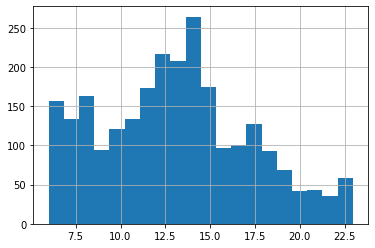

In [36]:
df2.Interest_Rate.hist(bins=20)

In [37]:
import seaborn as sns

C:\Users\gagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

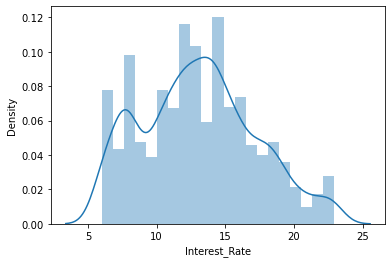

In [38]:
sns.distplot(df2.Interest_Rate)

C:\Users\gagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

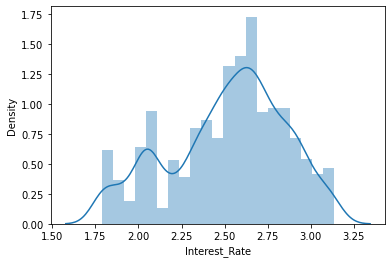

In [39]:
sns.distplot(np.log(df2.Interest_Rate))

In [40]:
df2['ln_Interest_Rate'] = np.log(df2.Interest_Rate)

In [41]:
df2.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,2.494857
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,3.090133
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,2.301585
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,1,2.460443


In [42]:
df2.drop(['Interest_Rate'], axis=1, inplace=True)

In [43]:
df2.head()

,Amount_Requested,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg,Loan_Purpose_credit_card,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate
0,20000.0,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,0,...,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,0,...,0,0,0,0,0,0,0,0,0,2.494857
2,35000.0,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,0,...,0,0,0,0,0,0,0,0,0,3.090133
3,10000.0,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,0,...,0,0,0,0,0,0,0,0,0,2.301585
4,12000.0,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,1,...,0,0,0,0,0,0,0,0,1,2.460443


## Variable Reduction

In [44]:
### Linearity
corr_y = df2.corrwith(df2.ln_Interest_Rate)

In [45]:
corr_y.to_csv('corr_with_y.csv')

In [46]:
#Feature reduction

#cv = std/mean

df2.apply(lambda x: x.std()/x.mean())

Amount_Requested                    0.628328
Loan_Length                         0.240686
Debt_To_Income_Ratio                0.486326
Monthly_Income                      0.549858
Open_CREDIT_Lines                   0.435441
Revolving_CREDIT_Balance            0.999536
Inquiries_in_the_Last_6_Months      1.288087
Employment_Length                   0.618898
FICO_avg                            0.049090
Loan_Purpose_credit_card            2.152321
Loan_Purpose_debt_consolidation     0.955585
Loan_Purpose_educational           12.873731
Loan_Purpose_home_improvement       3.931100
Loan_Purpose_house                 11.137756
Loan_Purpose_major_purchase         4.874626
Loan_Purpose_medical                9.075587
Loan_Purpose_moving                 9.232605
Loan_Purpose_other                  3.382660
Loan_Purpose_renewable_energy      24.984989
Loan_Purpose_small_business         5.267517
Loan_Purpose_vacation              10.867146
Loan_Purpose_wedding                7.945301
Home_Owner

In [47]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression, RFE, SelectKBest   

In [48]:
target = df2.ln_Interest_Rate
features = df2[df2.columns.difference(['ln_Interest_Rate'])]

In [49]:
F_values, p_values = f_regression(features, target )

In [50]:
f_reg_results = pd.concat([pd.Series(features.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)
f_reg_results.columns = ['Feature', 'F_value', 'P_Value']

In [51]:
f_reg_results = f_reg_results.sort_values(by='P_Value')
f_reg_results.to_csv('f_reg_results.csv')

In [52]:
f_reg_results

,Feature,F_value,P_Value
3,FICO_avg,3100.706573,0.000000e+00
9,Loan_Length,438.264400,8.549505e-90
0,Amount_Requested,250.655568,7.129766e-54
1,Debt_To_Income_Ratio,82.470669,2.121676e-19
8,Inquiries_in_the_Last_6_Months,81.193336,3.966925e-19
11,Loan_Purpose_debt_consolidation,45.367333,2.019960e-11
15,Loan_Purpose_major_purchase,31.625414,2.077637e-08
13,Loan_Purpose_home_improvement,24.090299,9.784422e-07
7,Home_Ownership_RENT,18.614306,1.662375e-05
25,Revolving_CREDIT_Balance,16.008023,6.490883e-05


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [54]:
# RFE - Recursive Feature Elimination
RFE_Model = RFE(estimator = RandomForestRegressor(), n_features_to_select=10).fit(features, target)

In [55]:
features.columns

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'FICO_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance'],
      dtype='object')

In [56]:
RFE_Model.get_support()

array([ True,  True,  True,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True])

In [57]:
features.columns[RFE_Model.get_support()]

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'FICO_avg', 'Home_Ownership_RENT', 'Inquiries_in_the_Last_6_Months',
       'Loan_Length', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance'],
      dtype='object')

In [58]:
features.columns

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'FICO_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance'],
      dtype='object')

In [59]:
RFE_Model.ranking_

array([ 1,  1,  1,  1, 16, 17,  8,  1,  1,  1,  5,  3, 13,  6, 12,  9, 14,
        7,  2, 15,  4, 11, 10,  1,  1,  1])

In [60]:
rfe_ranking = pd.concat([pd.Series(features.columns), pd.Series(RFE_Model.ranking_)], axis=1)

In [61]:
rfe_ranking.columns = ['feature', 'rank']

In [62]:
features.columns[RFE_Model.get_support()]

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'FICO_avg', 'Home_Ownership_RENT', 'Inquiries_in_the_Last_6_Months',
       'Loan_Length', 'Monthly_Income', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance'],
      dtype='object')

In [63]:
rfe_ranking = rfe_ranking.sort_values(by='rank')

In [64]:
rfe_ranking

,feature,rank
0,Amount_Requested,1
23,Monthly_Income,1
24,Open_CREDIT_Lines,1
9,Loan_Length,1
8,Inquiries_in_the_Last_6_Months,1
7,Home_Ownership_RENT,1
25,Revolving_CREDIT_Balance,1
1,Debt_To_Income_Ratio,1
3,FICO_avg,1
2,Employment_Length,1


In [65]:
rfe_ranking.to_csv('rfe_ranking.csv')

In [66]:
final_list = [\
 #   'Amount_Requested',
  #      'Monthly_Income',
 #       'Open_CREDIT_Lines',
 #       'Loan_Length',
        'Inquiries_in_the_Last_6_Months',
        'Home_Ownership_RENT',
        'Revolving_CREDIT_Balance',
#        'Debt_To_Income_Ratio',
        'FICO_avg',
  #      'Employment_Length',
        'Loan_Purpose_debt_consolidation',
        'Loan_Purpose_major_purchase',
        'Loan_Purpose_home_improvement',
        'Loan_Purpose_medical']

In [67]:
#multicolinieity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif_values = pd.concat([pd.Series(final_list), pd.Series([variance_inflation_factor(features[final_list].values, i) for i in range(len(final_list))])], axis=1)

In [69]:
vif_values.columns = ['feature', 'vif']
vif_values.sort_values(by='vif', ascending=False)

,feature,vif
3,FICO_avg,5.982230
4,Loan_Purpose_debt_consolidation,2.419491
2,Revolving_CREDIT_Balance,2.094437
1,Home_Ownership_RENT,1.974604
0,Inquiries_in_the_Last_6_Months,1.600335
6,Loan_Purpose_home_improvement,1.226880
5,Loan_Purpose_major_purchase,1.124113
7,Loan_Purpose_medical,1.033929


In [70]:
#Data preparation-4
from sklearn.model_selection import train_test_split

In [71]:
df3 = df2[final_list+['ln_Interest_Rate']]

In [72]:
train, test = train_test_split(df3, test_size = 0.3, random_state = 123)

In [73]:
train.columns

Index(['Inquiries_in_the_Last_6_Months', 'Home_Ownership_RENT',
       'Revolving_CREDIT_Balance', 'FICO_avg',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_home_improvement', 'Loan_Purpose_medical',
       'ln_Interest_Rate'],
      dtype='object')

In [74]:
formula = 'ln_Interest_Rate~'+'+'.join(train.columns.difference(['ln_Interest_Rate', 'Loan_Purpose_home_improvement' ,'Loan_Purpose_medical', 'Loan_Purpose_major_purchase', 'Home_Ownership_RENT']))

In [75]:
formula

'ln_Interest_Rate~FICO_avg+Inquiries_in_the_Last_6_Months+Loan_Purpose_debt_consolidation+Revolving_CREDIT_Balance'

In [76]:
ols_model = smf.ols(formula, data=train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     593.1
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          2.47e-323
Time:                        11:50:50   Log-Likelihood:                 159.02
No. Observations:                1750   AIC:                            -308.0
Df Residuals:                    1745   BIC:                            -280.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [77]:
#ln_Interest_Rate =7.4035-0.0070*FICO_avg+0.0356*Inquiries_in_the_Last_6_Months+0.0479*Loan_Purpose_debt_consolidation+1.764e-06*Revolving_CREDIT_Balance

#Interest_Rate = exp(ln_Interest_Rate)

In [78]:
#train['pred_ln_intrest_rate'] =7.4035-0.0070*train.FICO_avg+0.0356*train.Inquiries_in_the_Last_6_Months+0.0479*train.Loan_Purpose_debt_consolidation+1.764e-06*train.Revolving_CREDIT_Balance

C:\Users\gagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

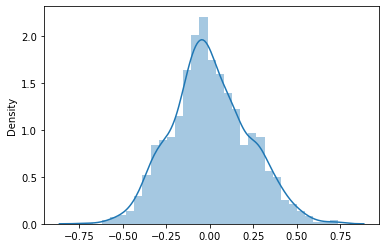

In [79]:
sns.distplot(ols_model.resid)

In [80]:
train_pred = np.exp(ols_model.predict(train))
test_pred = np.exp(ols_model.predict(test))
train_act = np.exp(train.ln_Interest_Rate)
test_act = np.exp(test.ln_Interest_Rate)

In [81]:
print('train_MAPE:', np.mean(np.abs(train_act- train_pred)/train_act))

train_MAPE: 0.17678494809898188


In [82]:
print('test_MAPE:', np.mean(np.abs(test_act- test_pred)/test_act))

test_MAPE: 0.1760793626650288


In [83]:
print('train_RMSE:', np.sqrt(np.mean((train_act- train_pred)**2)))
print('test_RMSE:', np.sqrt(np.mean((test_act- test_pred)**2)))

train_RMSE: 2.8062559211366285
test_RMSE: 2.8203990191286574


In [84]:
print('train_corr:', np.corrcoef(train_act, train_pred)[1][0])
print('test_corr:', np.corrcoef(test_act, test_pred)[1][0])

train_corr: 0.7397565000453317
test_corr: 0.7405452853411439


In [85]:
df3.head()

,Inquiries_in_the_Last_6_Months,Home_Ownership_RENT,Revolving_CREDIT_Balance,FICO_avg,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Loan_Purpose_medical,ln_Interest_Rate
0,2.0,0,14272.0,737.0,1,0,0,0,2.186051
1,1.0,0,11140.0,717.0,1,0,0,0,2.494857
2,1.0,0,21977.0,692.0,1,0,0,0,3.090133
3,0.0,0,9346.0,697.0,1,0,0,0,2.301585
4,0.0,1,14469.0,697.0,0,0,0,0,2.460443


In [86]:
#Implementation
#For new customer
FICO_avg = 750
Inquiries_in_the_Last_6_Months = 5
Loan_Purpose_debt_consolidation = 1
Revolving_CREDIT_Balance = 15000

In [87]:
print('Rate of Intrest for given application:', np.exp(7.4035-0.0070*FICO_avg+0.0356*Inquiries_in_the_Last_6_Months+0.0479*Loan_Purpose_debt_consolidation+1.764e-06*Revolving_CREDIT_Balance))

Rate of Intrest for given application: 11.087961830207295


In [88]:
#To build web application 
import pickle

# now you can save it to a file
with open('ols_model.pkl', 'wb') as f:
    pickle.dump(ols_model, f)

In [89]:
# now you can save it to a file
with open('data_final.pkl', 'wb') as f:
    pickle.dump(df3, f)

In [90]:
# now you can save it to a file
with open('data_final.pkl', 'rb') as f:
    data =  pickle.load(f)

In [91]:
train

,Inquiries_in_the_Last_6_Months,Home_Ownership_RENT,Revolving_CREDIT_Balance,FICO_avg,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Loan_Purpose_medical,ln_Interest_Rate
1351,0.0,0,6889.0,707.0,1,0,0,0,2.373975
903,0.0,0,1052.0,782.0,0,0,1,0,2.232163
2049,1.0,0,31640.0,672.0,1,0,0,0,2.684440
798,0.0,1,707.0,747.0,0,1,0,0,2.499795
1360,0.0,1,6930.0,677.0,0,0,0,0,2.645465
...,...,...,...,...,...,...,...,...,...
1147,0.0,0,3936.0,717.0,0,0,1,0,2.889816
2154,0.0,0,8747.0,722.0,1,0,0,0,2.573375
1766,0.0,0,19566.0,757.0,0,0,0,0,2.013569
1122,0.0,1,25.0,752.0,1,0,0,0,2.301585


In [92]:
train['pre_ln_int_rate'] = ols_model.predict(train)

In [93]:
train.head()

,Inquiries_in_the_Last_6_Months,Home_Ownership_RENT,Revolving_CREDIT_Balance,FICO_avg,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Loan_Purpose_medical,ln_Interest_Rate,pre_ln_int_rate
1351,0.0,0,6889.0,707.0,1,0,0,0,2.373975,2.496824
903,0.0,0,1052.0,782.0,0,0,1,0,2.232163,1.911698
2049,1.0,0,31640.0,672.0,1,0,0,0,2.684440,2.822015
798,0.0,1,707.0,747.0,0,1,0,0,2.499795,2.156969
1360,0.0,1,6930.0,677.0,0,0,0,0,2.645465,2.659707


In [94]:
train['int_rate_actual'] = np.exp(train.ln_Interest_Rate)
train['int_rate_pred'] = np.exp(train.pre_ln_int_rate)

In [95]:
train.head()

,Inquiries_in_the_Last_6_Months,Home_Ownership_RENT,Revolving_CREDIT_Balance,FICO_avg,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Loan_Purpose_medical,ln_Interest_Rate,pre_ln_int_rate,int_rate_actual,int_rate_pred
1351,0.0,0,6889.0,707.0,1,0,0,0,2.373975,2.496824,10.74,12.143864
903,0.0,0,1052.0,782.0,0,0,1,0,2.232163,1.911698,9.32,6.764563
2049,1.0,0,31640.0,672.0,1,0,0,0,2.684440,2.822015,14.65,16.810683
798,0.0,1,707.0,747.0,0,1,0,0,2.499795,2.156969,12.18,8.644893
1360,0.0,1,6930.0,677.0,0,0,0,0,2.645465,2.659707,14.09,14.292108


In [96]:
train['deciles'] = pd.qcut(train.int_rate_pred, q=10, labels=False)

In [97]:
train.head()

,Inquiries_in_the_Last_6_Months,Home_Ownership_RENT,Revolving_CREDIT_Balance,FICO_avg,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Loan_Purpose_home_improvement,Loan_Purpose_medical,ln_Interest_Rate,pre_ln_int_rate,int_rate_actual,int_rate_pred,deciles
1351,0.0,0,6889.0,707.0,1,0,0,0,2.373975,2.496824,10.74,12.143864,4
903,0.0,0,1052.0,782.0,0,0,1,0,2.232163,1.911698,9.32,6.764563,0
2049,1.0,0,31640.0,672.0,1,0,0,0,2.684440,2.822015,14.65,16.810683,9
798,0.0,1,707.0,747.0,0,1,0,0,2.499795,2.156969,12.18,8.644893,1
1360,0.0,1,6930.0,677.0,0,0,0,0,2.645465,2.659707,14.09,14.292108,6


In [98]:
train[['deciles', 'int_rate_pred','int_rate_actual' ]].groupby('deciles').agg(np.mean)

,int_rate_pred,int_rate_actual
deciles,,
0,7.312773,8.021954
1,9.215827,8.875429
2,10.591978,10.470274
3,11.551554,11.135886
4,12.498344,12.778857
5,13.339676,14.327943
6,14.224149,14.896933
7,15.158691,15.614990
8,15.946625,16.742342


In [99]:
test['pre_ln_int_rate'] = ols_model.predict(test)
test['int_rate_actual'] = np.exp(test.ln_Interest_Rate)
test['int_rate_pred'] = np.exp(test.pre_ln_int_rate)

test['deciles'] = pd.qcut(test.int_rate_pred, q=10, labels=False)

test_deciles = test[['deciles', 'int_rate_pred','int_rate_actual' ]].groupby('deciles').agg(np.mean)

In [100]:
test_deciles.to_csv('test_deciles.csv')